# Astronomy - Working with FITS Images

FITS, the [Flexible Image Transport System](https://fits.gsfc.nasa.gov/), is an open standard digital file format widely used in astronomy for representing and working with 2D images. 

This section demonstrates a range of tools for accessing and working with FITS image data.

## `astropy`

The [`astropy`](https://www.astropy.org/) package provides *"a common core package for Astronomy in Python"* with the intention of fostering *"an ecosystem of interoperable astronomy packages"*.

In [1]:
%%capture
try:
    import astropy
except:
    %pip install astropy

Let's start with an example of dowloading an image file in the FITS format from an known location:

In [2]:
from astropy.utils.data import download_file
from astropy.io import fits

horsehead_url = 'http://data.astropy.org/tutorials/FITS-images/HorseHead.fits'

#image_file is the path the downloaded and locally stashed file
image_file = download_file(horsehead_url, cache=True )
image_file

'/Users/tonyhirst/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents'

In [3]:
hdu_list = fits.open(image_file)
#hdu_list.info()

#save file under another name in the local directory: hh.fits
import os

if 'hh.fits' not in os.listdir():
    hdu_list.writeto('hh.fits')

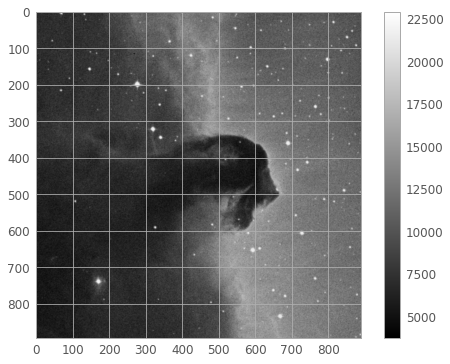

In [4]:
import matplotlib.pyplot as plt

#Nice styling
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

image_data = fits.getdata('hh.fits')

#Display the image
plt.imshow(image_data, cmap='gray')
plt.colorbar();

## `aplypy`

[`aplypy`](http://aplpy.github.io/), the [*Astronomical Plotting Library in Python*](https://aplpy.github.io/), is a Python module aimed at producing publication-quality plots of astronomical imaging data in FITS format using `matplotlib`.

In [5]:
%%capture
try:
    import aplpy
except:
    %pip install astropy
    %pip install git+https://github.com/astropy/pyregion.git
    %pip install aplpy 

Import the package and render a local fits file:

INFO: Auto-setting vmin to  3.592e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.990e+04 [aplpy.core]


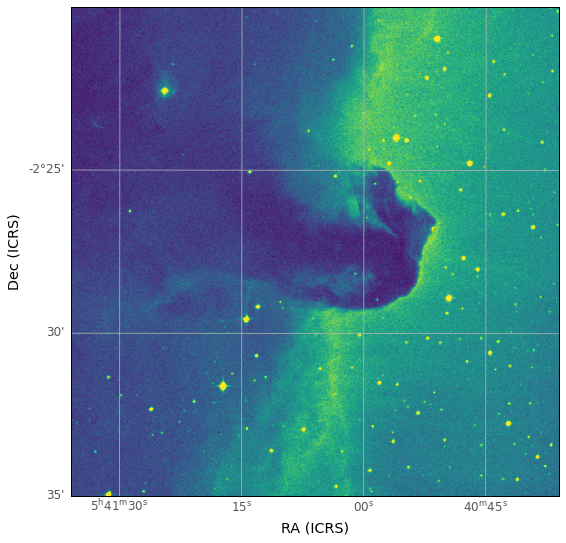

In [6]:
import aplpy

hh = aplpy.FITSFigure('hh.fits')
hh.show_colorscale()

We can also view the image in grayscale:

INFO: Auto-setting vmin to  3.491e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.142e+04 [aplpy.core]


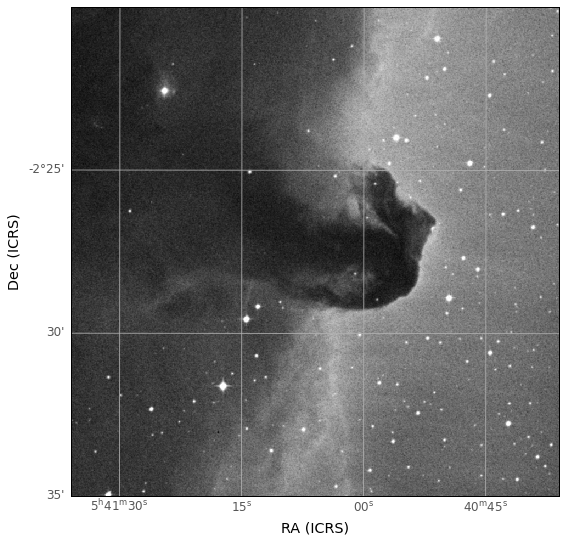

In [7]:
# Close the previous image session
hh.close()

hh = aplpy.FITSFigure('hh.fits')
hh.show_grayscale()

In [8]:
hh.close()

The `aplpy` package plays nicely with the `astropy` package. For example, we can render a graysclae image and then overlay it with a marker using coordinates obtained from a call to `astropy.coordinates` for the centroid of the *'Horsehead Nebula'*:

INFO: Auto-setting vmin to  3.516e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.070e+04 [aplpy.core]


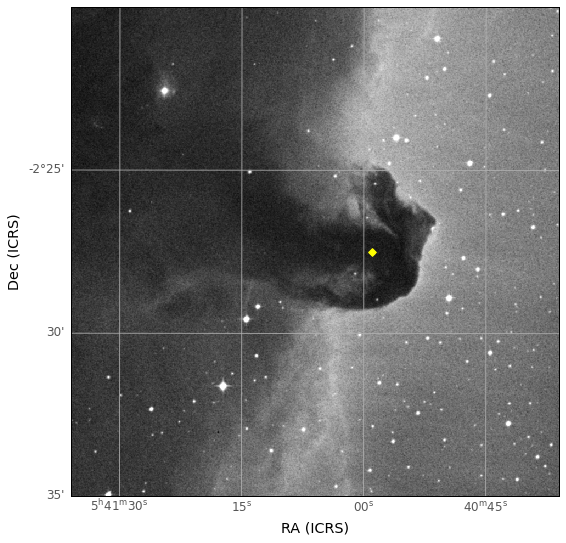

In [9]:
from astropy import coordinates

hh = aplpy.FITSFigure('hh.fits')
hh.show_grayscale()

# We can lookup data for astronomical objects by name
HORSEHEAD_NEBULA = 'Horsehead Nebula'

horsehead = coordinates.SkyCoord.from_name(HORSEHEAD_NEBULA)
hh.show_markers(horsehead.ra.deg, horsehead.dec.deg, marker='D', c='yellow')

In [10]:
hh.close()

## `astroquery`

The [`astroquery`](https://astroquery.readthedocs.io/en/latest/index.html) package provides a range of tools for querying astronomical data services and retrieving images from them:

In [11]:
%%capture
try:
    from astroquery.skyview import SkyView
except:
    %pip install astropy astroquery

For example, we can look up a record by name on the [SIMBAD Astronomical Database](http://simbad.u-strasbg.fr/simbad/):

In [12]:
from astroquery.simbad import Simbad

result_table = Simbad.query_object("Horsehead nebula")

result_table.to_pandas().T

,0
MAIN_ID,NAME Horsehead Nebula
RA,05 40 59.0
DEC,-02 27 30
RA_PREC,5
DEC_PREC,5
COO_ERR_MAJA,NaN
COO_ERR_MINA,NaN
COO_ERR_ANGLE,0
COO_QUAL,D
COO_WAVELENGTH,


Or we can download an image by name from the [Skyview virtual observatory](https://skyview.gsfc.nasa.gov/current/cgi/titlepage.pl):

In [13]:
from astroquery.skyview import SkyView

hh2_images = SkyView.get_images(position=HORSEHEAD_NEBULA,
                                survey=['2MASS-K'], pixels=1500)

hh2_images

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x12e2a9b20>]]

Let's save the file and then preview it:

INFO: Auto-setting vmin to  5.158e+02 [aplpy.core]
INFO: Auto-setting vmax to  5.530e+02 [aplpy.core]


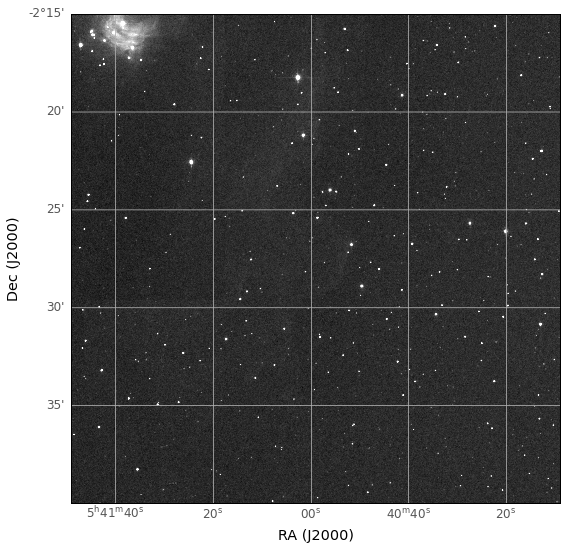

In [14]:
import os

out_file = 'hh2.fits'

if not os.path.isfile(out_file):
    hh2_images[0].writeto(out_file)

hh2 = aplpy.FITSFigure(out_file)
hh2.show_grayscale()

In [15]:
hh2.close()

## `astrowidgets`

The [`astrowidgets`](https://astrowidgets.readthedocs.io/en/latest/astrowidgets/index.html) pckage provivdes a scripable image viewing widget for exploring FITS images.

In [16]:
%%capture
try:
    import astrowidgets
except:
    %pip install astrowidgets 

For example, let's load the widget:

In [17]:
from astrowidgets import ImageWidget

image = ImageWidget()

image

ImageWidget(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\x…

And then load an image into that widget at a particular zoom level and a centered on location cordinates grabbed from a co-oordinate lookup:

In [18]:
image.load_fits(out_file)

from astropy.coordinates import SkyCoord

image.center_on(SkyCoord.from_name(HORSEHEAD_NEBULA))
image.zoom_level = 2

## `sunpy`

The [`sunpy`](https://sunpy.org/) package provides a wide range of open source solar data analysis tools.

In [19]:
%%capture
try:
    import sunpy.map
except:
    %pip install sunpy

Let's try a quick demo:

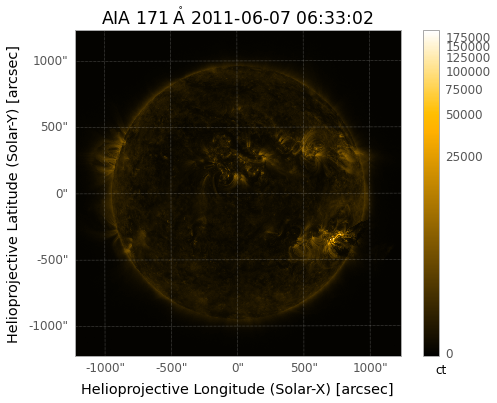

In [20]:
import sunpy.data.sample
import sunpy.map

aia = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
aia.peek()

By default, we're expected to use matplotlib to view images, so we'll create a simple utility function to help us do that.

In [21]:
import matplotlib.pyplot as plt

import sunpy.map

def plot_image(imagefile, limb=False, grid=True, colorbar=True):
    ''' Quick function to help display of solar images. '''
    fig = plt.figure()
    
    m = sunpy.map.Map(imagefile)
    #ax = plt.subplot(111, projection=m)
    m.plot()
    
    if limb:
        m.draw_limb()
    if grid:
        m.draw_grid()
    if colorbar:
        plt.colorbar()

    plt.title=None
    plt.show()

Let's use our convenience function to render a demo image:

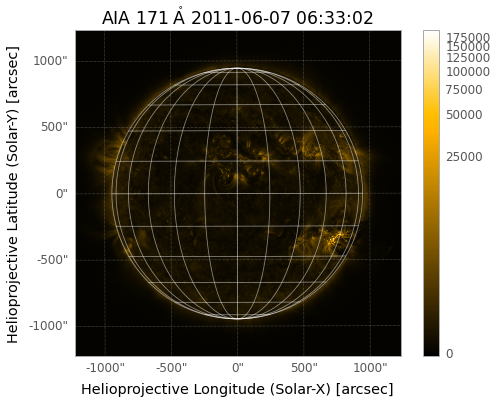

In [22]:
plot_image(sunpy.data.sample.AIA_171_IMAGE)

We can remove the grid and colorbars if required:

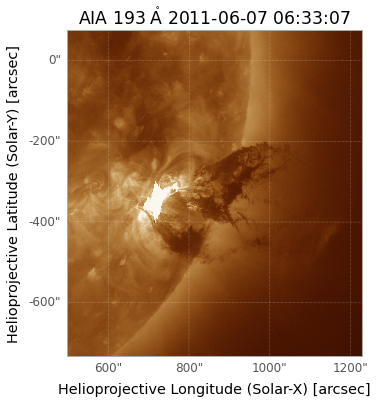

In [23]:
plot_image(sunpy.data.sample.AIA_193_CUTOUT01_IMAGE,
           colorbar=False, grid=False)